### Анализ продаж видеоигр в интернет магазине Стримчик
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
from scipy import stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

#### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
display(games.head(10)) # Смотрим табличку
display(games.info()) # Общая инфа
display(games.isna().sum()) # Пропуски
display(f'Количество полных дубликатов: {games.duplicated().sum()}') #Полные дубликаты
dup_names=games['Name'].duplicated().sum() # Считаем дубликаты в названиях
display(f'Количество дубликатов названий: {dup_names}')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

'Количество полных дубликатов: 0'

'Количество дубликатов названий: 5155'

In [4]:
games.columns=games.columns.str.lower() # сразу опускаем заголовки столбцов в нижний регистр чтоб два раза не бегать.

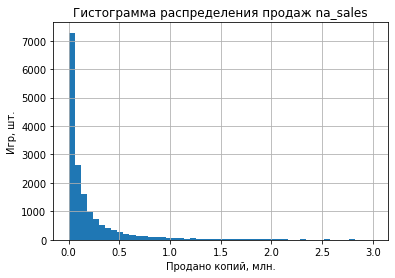

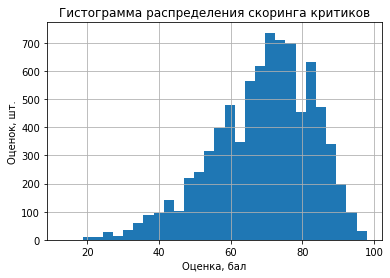

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [5]:
# Характерная гистограмма продаж
games['na_sales'].hist(bins=50, range=(0,3))
plt.title ("Гистограмма распределения продаж na_sales")
plt.xlabel('Продано копий, млн.')
plt.ylabel("Игр, шт.")
plt.show()

# Характерная гистограмма скорингов
games['critic_score'].hist(bins=30)
plt.title ("Гистограмма распределения скоринга критиков")
plt.xlabel('Оценка, бал')
plt.ylabel("Оценок, шт.")
plt.show()

# Стат. данные
display(games.describe())
# Отдельно для пользовательского скоринга
display(games['user_score'].describe())
# Какие бывают жанры
display(games['genre'].unique())

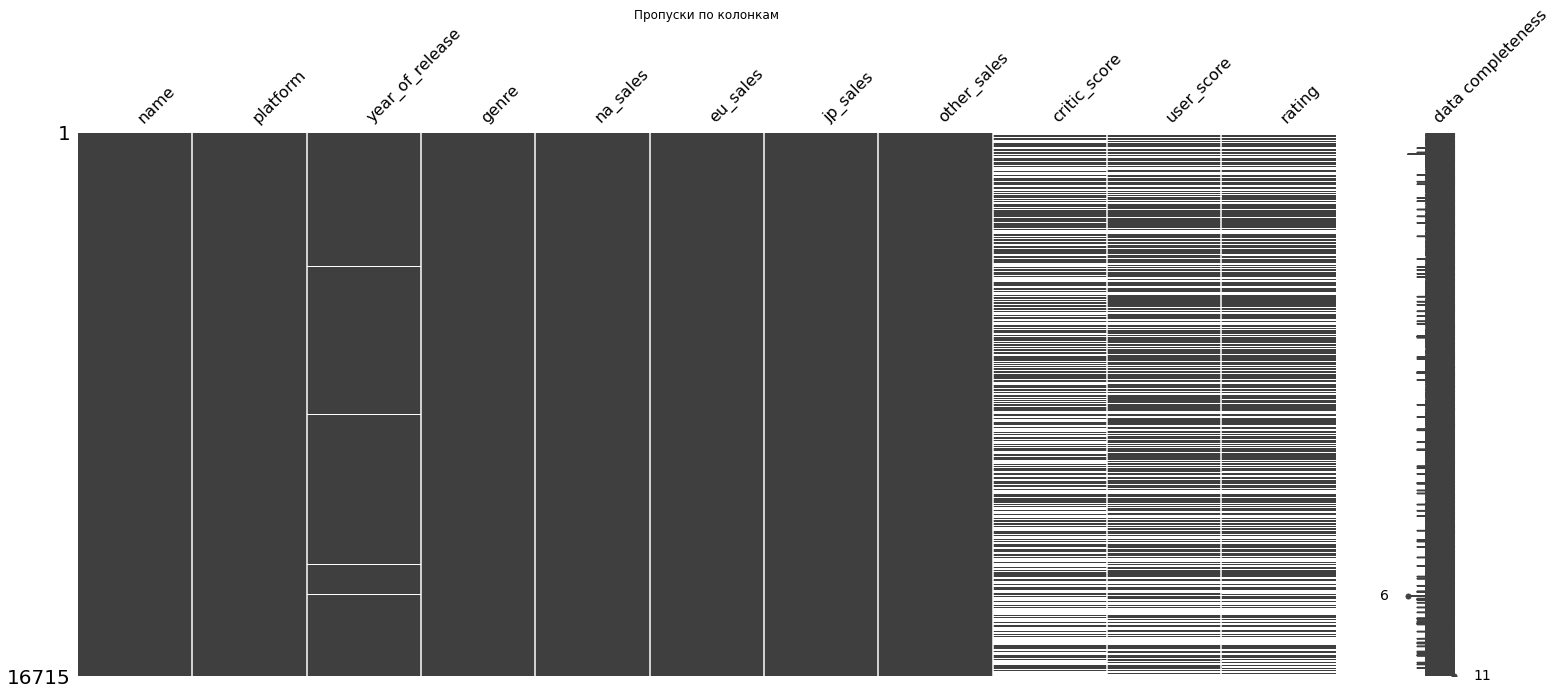

In [6]:
msno.matrix(games, labels=True);
plt.title ("Пропуски по колонкам");

Выводы по шагу 1:

Получен массив данных games.csv, содержащий 16 715 строк с данными о продажах игр и описанием.

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

При загрузке данных выявлено:

    В названиях столбцов встречается верхний регистр. Устранено сразу, чтобы дальше не путаться.
    Год релиза записан не в формате даты, а float, но пока это меня устраивает.
    Пользовательский рейтинг представлен текстом за счет наличия большого количества записей со значением tbd (определить позднее). Т.е. по сути, это отсутствие данных. За счет этого остальные, числовые значения рейтинга теряют формат и неудобны к анализу. Заменить tbd на пропуск, колонку переформатировать во float.
    Полные дубликаты отсутствуют, есть дубликаты в названиях игр, они объсняются тем, что одна и та же игра выходит на разных платформах, за счет чего для нее формируется несколько записей.
    Значительное число пропусков, особенно в скоринге и рейтинге. Пропуски в скорингах связываю с тем, что пользователи и критики не оставили оценок на малопопулярные игры. Пропуски в рейтинге присущи старым играм и играм с низкой популярностью.
    Два пропуска в названии игры - считаю можно удалить безболезненно.
    Наибольшая проблема - отсутствие года релиза в 269 случаев. В некоторых случаях год релиза заложен в названии игры и его можно восстановить.
    В жанре часто встречается Misc - типа иное, появился при категоризации при подготовке данных перед отправкой мне. Заменяю на None

#### Шаг 2. Подготовьте данные
    Замените названия столбцов (приведите к нижнему регистру);
    Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    Обработайте пропуски при необходимости:
    Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    Опишите причины, которые могли привести к пропускам;
    Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [7]:
games=games.dropna(subset=['name']) # Сбрасываем две записи с играми без названия
games.loc[games['user_score']=='tbd', 'user_score']=None # Заменяем tbd на пропуск
games.loc[games['genre']=='Misc', 'genre']=None # Заменяем Misc на пропуск
games['user_score'] = pd.to_numeric(games['user_score']) # меняем формат user_score на флоат

games['year'] = games['name'].str.extract(r'(\d{4})', expand=False) # добавляем колонку год, который вытащили из названия игры
games['year'] = pd.to_numeric(games['year'], errors='coerce') 
# Если year_of_release пустой, а year не пусто - берем данные из year и суем в year_of_release
games.loc[(games['year_of_release'].isnull())&(games['year'].notnull()), ['year_of_release']]=games['year']
del games['year'] # убираем ненужную теперь колонку

games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales'] # считаем сумму продаж

In [8]:
display(games.head(5))
display(games.info())
display(games.isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            14963 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sum_sales        16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


None

name                  0
platform              0
year_of_release     252
genre              1750
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
sum_sales             0
dtype: int64

Выводы по шагу 2:

    Выброшены 2 записи игр без названий
    Год релиза восстановлен для 17 игр. Не знаю, если стоило заморачиваться.
    В поле user_score записи со значением tbd заменены на пропуски, формат данных переведен во float
    В поле genre значение Misc заменено на None
    Пропуски в рейтингах и скорингах оставлены без изменений, чтобы не искажать данные
    Добавлен столбец с суммарными продажами sum_sales    

Считаю, что причины возникновения пропусков:
    
    - name - единичные пропуски, скорее всего связаны с неполным/некорректным заполнением данных на сайте магазина вручную
    - year_of_release - тоже немного пропусков, опять же скорее неаккуратность при заполнении данных на сайте магазина.
    - genre - невнимательность при заполнении карточки игры в магазине, сложность определения жанровой принадлежности, отсутствие указания жанра игры в описании, полученном от производителя.
    - critic_score - игры без оценок просто не проходили критиков в отчетный период (время вывешивания игры на сайте). Непопулярные/новые/старые и т.п. Потенциально может быть проблема в скриптах сбора оценок критиков для сайта со сторонних источников, или выбор аггрегатора отзывов, где много пропусков.
    - user_score - игры без оценок не получали отзывов от игроков в отчетный период (время вывешивания игры на сайте) по причине малой продаваемости/популярности/возраста.
    - rating - по каким то причинам игры не попали в рассмотрение Entertainment Software Rating Board. Причины те же - старые, новые, не популярные, политика компании по принятию игр к рассмотрению.
    
Замены обусловлены:
    
    - Замена user_score tbd (определить позже) на пропуск ввиду полной аналогии этих значений и большего удобства обработки пропуска, нежели tbd.
    - Замена genre Msc (иное) на пропуск ввиду полной смысловой аналогии этих значений и большего удобства обработки пропуска, чем Msc

#### Шаг 3. Проведите исследовательский анализ данных
    1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    4. Не учитывайте в работе данные за предыдущие годы.
    5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    8. Соотнесите выводы с продажами игр на других платформах.
    9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

##### Вопрос 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

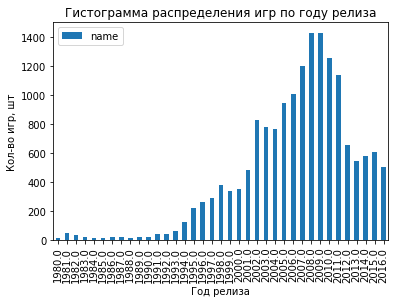

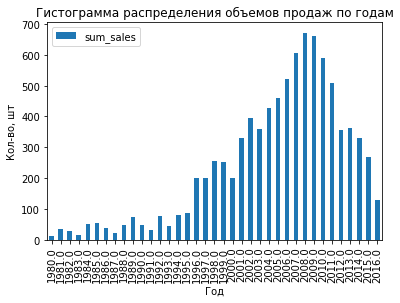

In [9]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar')
plt.title ("Гистограмма распределения игр по году релиза")
plt.xlabel('Год релиза')
plt.ylabel("Кол-во игр, шт")
plt.show()

games.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')
plt.title ("Гистограмма распределения объемов продаж по годам")
plt.xlabel('Год')
plt.ylabel("Кол-во, шт")
plt.show()

Ответ на вопрос 1: Пик производства игр пришелся на 2008-2009 годы, дальше практически двукратное снижение количества релизов к 2012 году. Откат к 2015 и потом снова падение. Если смотреть на объемы продаж по годам релиза - это крах. Поэтому 2017 - год неопределенности. Либо индустрия найдет выход (скорее всего), либо продолжит падение. Анализировать ситуацию до 2010 года нет смысла.

##### Вопрос 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
##### Вопрос 3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
##### Вопрос 4. Не учитывайте в работе данные за предыдущие годы.
##### Вопрос 5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Все скопом, поскольку на пересекающихся действиях основаны.

In [10]:
# Делаем сводную табличку - платформа - первый релиз - последний релиз - продажи - время жизни - продажи/год
platform_names=games['platform'].unique()
yearstart=[]
yearend=[]
sum_sales=[]
releases=[]
for name in platform_names:
    yearstart.append(games[games['platform']==name]['year_of_release'].min())
    yearend.append(games[games['platform']==name]['year_of_release'].max())
    sum_sales.append(games[games['platform']==name]['sum_sales'].sum())
    releases.append(games[games['platform']==name]['year_of_release'].count())

platforms_data = pd.DataFrame({'name':platform_names,'start':yearstart, 'end':yearend, 'sales':sum_sales, 'releases':releases})
platforms_data['life']=platforms_data['end']-platforms_data['start']
platforms_data['sales_per_year']=platforms_data['life']/platforms_data['sales']
display(platforms_data.sort_values('sales', ascending=False))

,name,start,end,sales,releases,life,sales_per_year
6,PS2,2000.0,2011.0,1255.77,2134,11.0,0.008760
4,X360,2005.0,2016.0,971.42,1234,11.0,0.011324
5,PS3,2006.0,2016.0,939.65,1306,10.0,0.010642
0,Wii,2006.0,2016.0,907.51,1286,10.0,0.011019
3,DS,1985.0,2013.0,806.12,2122,28.0,0.034734
12,PS,1994.0,2003.0,730.86,1190,9.0,0.012314
8,GBA,2000.0,2007.0,317.85,811,7.0,0.022023
9,PS4,2013.0,2016.0,314.14,392,3.0,0.009550
16,PSP,2004.0,2015.0,294.05,1195,11.0,0.037409
14,PC,1985.0,2016.0,259.52,958,31.0,0.119451


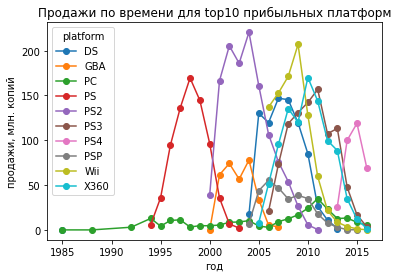

In [11]:
# выбираем самые прибыльные платформы 
top10_platforms=games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False).head(10) 
top10_platforms=top10_platforms.index
top10_platforms = pd.DataFrame({'platform':top10_platforms})
games_on_top10_platforms=games.merge(top10_platforms, on='platform')
#display(games_on_top10_platforms.head(5))

# По актуальным платформам собираем данные о продажах в одну таблицу и печатаем ее в виде графика
top10_pf=games_on_top10_platforms.pivot_table(index='platform', values='sum_sales', columns='year_of_release', aggfunc='sum').T
top10_pf.plot(style='o-', xlabel='год', ylabel='продажи, млн. копий', title='Продажи по времени для top10 прибыльных платформ');

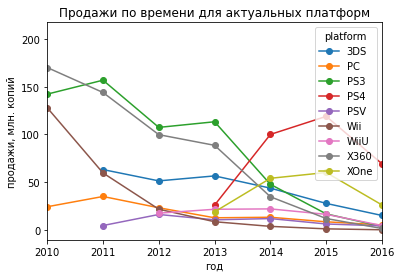

In [12]:
# Выбираем актуальные платформы, т.е. те, на которых есть релизы в 2016 году.
actual_platforms=games[games['year_of_release']==2016]['platform'].unique() # Выбрали названия таких платформ
actual_platforms = pd.DataFrame({'platform':actual_platforms}) #сделали из них фрейм
games_on_actual_platforms=games.merge(actual_platforms, on='platform') # слили с основным фреймом попутно выбросив все остальные данные
#display(games_on_actual_platforms.sort_values('sum_sales', ascending=False).head(5))

# По актуальным платформам собираем данные о продажах в одну таблицу и печатаем ее в виде графика
act_pf=games_on_actual_platforms.pivot_table(index='platform', values='sum_sales', columns='year_of_release', aggfunc='sum').T
act_pf.plot(xlim=(2010, 2016), style='o-', xlabel='год', ylabel='продажи, млн. копий', title='Продажи по времени для актуальных платформ');

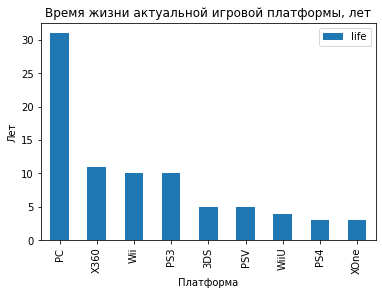

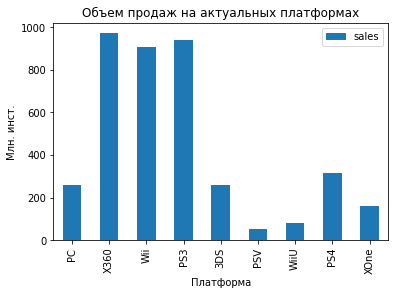

In [13]:
# строим график времени жизни актуальных платформ
platforms_data[platforms_data['end']==2016].sort_values('life', ascending=False).plot('name', 'life', kind='bar');
plt.xticks(rotation=90);
plt.title ("Время жизни актуальной игровой платформы, лет");
plt.xlabel("Платформа");
plt.ylabel("Лет");
plt.show()

# строим график времени объема продаж на актуальных платформах
platforms_data[platforms_data['end']==2016].sort_values('life', ascending=False).plot('name', 'sales', kind='bar');
plt.title ("Объем продаж на актуальных платформах");
plt.xlabel("Платформа");
plt.ylabel("Млн. инст.");
plt.show()

In [14]:
# Найдем самую успешную игру cо сравнительно свежим релизом
games[games['year_of_release']>2012].sort_values('sum_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,None,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [15]:
#Посмотрим как игра Grand Theft Auto портировалась и с какой частотой выпускались релизы
games[(games['name']=='Grand Theft Auto V')|(games['name']=='Grand Theft Auto IV')].sort_values('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
2371,Grand Theft Auto IV,PC,2008.0,Action,0.01,0.79,0.00,0.07,90.0,6.6,M,0.87
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [16]:
games13_16=games[games['year_of_release']>2012] # сбрасываем в новый массив все, что позже 2012 года.

Ответ на вопрос 2-5

В основном время жизни игровой платформы не превышает 11 лет. Практически всегда в первой половине срока жизни продажи растут, после пика - падают. Актуальные платформы реально делятся по линейкам производителей Sony (PS3, PS4, PSV), Microsoft (X360, XOne), Nintendo (Wii, WiiU). Особняком стоят PC как вечная классика и 3D как единственная в обзоре портативная игровая платформа.

Судя по стратегии Sony, одного из самых успешных поставщиков платформ, новая платформа выходит примерно на середине падения предыдущей (3/4 времени жизни предыдущей), далее за 3-4 года выходя на пик продаж.

Успешность платформы должна зависеть от релизов на ней игры. Причем, судя по гистограмме na_sales, коммерчески успешных игровых проектов существенно меньше, чем неуспешных. На примере Grand Theft Auto V видно, что игру сначала выпускают на популярных в это время платформах, далее портируя на остальные эту же версию игры, либо ее следующее поколение. Смена поколений игры очень грубо (поскольку на одном примере) можно оценить в 5 лет. Время портирования - год-два. При этом следующее поколение игры может выходить одновременно на самой новой платформе линейки и на предыдущей.

Таким образом, можно ожидать, что в ближайшее время появятся топовые игры на новых платформах PSV (релиз 2011), XOne (релиз 2013), WiiU (релиз 2012).

Поэтому при выборе диапазона данных для прогнозирования необходимо ориентироваться на следующие факторы:

    - время жизни платформ - нет смысла брать периоды более половины времени жизни платформы (примерно 5 лет), нет смысла рассматривать платформы, на которых не выходят релизы. Из платформ, относящихся к линейке какого-то производителя предпочтение следует отдавать наиболее свежей платформе.
    - время жизни релиза игры составляет порядка 5 лет. Это означает, что топовые игры на платформах появляются с задержкой от 1 года необходимого для портирования до 5 лет, необходимых для выпуска нового релиза.
    - динамика объема рынка после падения начавшегося в 2010 году рынок не оправился окончательно и может в любой момент начать подниматься, либо падать. Подъем рынка прежде всего может быть связан с появлением новых успешных проектов, либо обновлениями предыдущих.
    
Основываясь на вышеизложенном. Исходя из падения рынка, начавшегося 6 лет назад, появлением трех новых платформ основных поставщиков 5 лет назад, малым количеством новых успешных игровых проектов, считаю потенциально полезным для дальнейшей работы разделить рассмотрение на 2 части. 1 - анализ топовых релизов 2007-2010 года. Смотреть какие из них планируются к обновлению и в какие сроки это стратегия. 2 - смотреть ближайшие 2-3 года, скажем 2013-2016 для отслеживания тенденций изменений рынков, предпочтений пользователей и т.п. Это тактика. Поскольку стратегических задач перед нами не ставили, будет решать тактические и ограничимся 2013-2016 годами.

##### Вопрос 6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

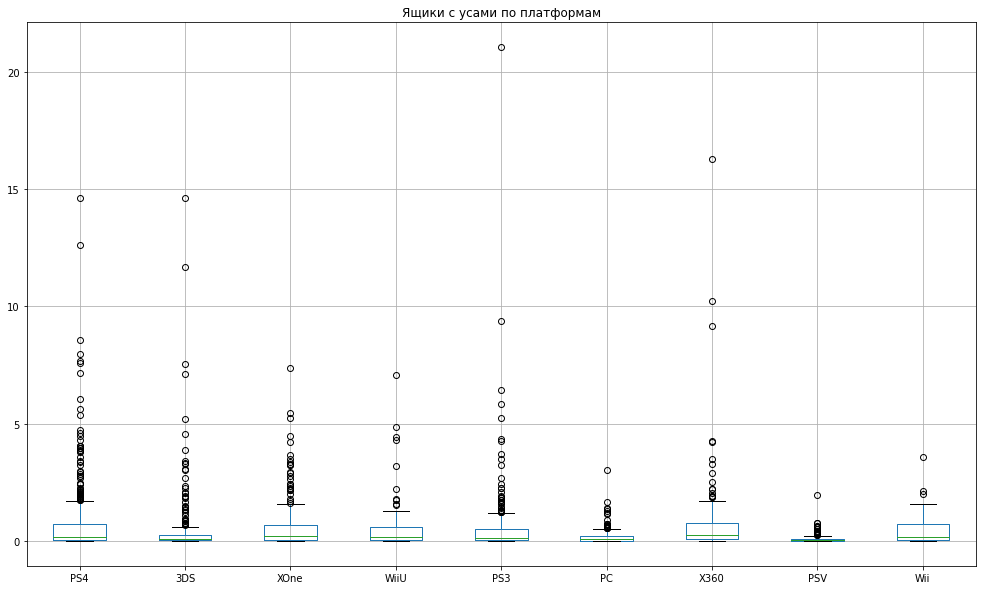

In [18]:
k=0
for platform in actual_platforms['platform']:
    col=games13_16[games13_16['platform']==platform]['sum_sales']
    col = col.reset_index(drop=True) 
    col.name=platform
    k +=1
    if k<2:
        platform_sales=pd.concat([col], axis=1) # сводим все сериесы в таблицу
    else:
        platform_sales=pd.concat([platform_sales, col], axis=1)
platform_sales.boxplot(figsize=(17,10));
plt.title ("Ящики с усами по платформам")
plt.show()

In [19]:
k=0

for platform in actual_platforms['platform']: # смотрим только актуальные платформы
    desc=games[(games['platform']==platform)&(games['year_of_release']>=2013)]['sum_sales'].describe() # берем стат. параметры
    desc.name=platform # меняем название для сериес
    k += 1
    if k<2:
        platform_stat=pd.concat([desc], axis=1) # сводим все сериесы в таблицу
    else:
        platform_stat=pd.concat([platform_stat, desc], axis=1)
        
platform_stat=platform_stat.T       # транспонируем таблицу    
platform_stat['sales']=platform_stat['mean']*platform_stat['count']   # сортируем
platform_stat.sort_values('sales', ascending=False)

,count,mean,std,min,25%,50%,75%,max,sales
PS4,392.0,0.801378,1.609456,0.01,0.060,0.200,0.730,14.63,314.14
PS3,345.0,0.525884,1.451939,0.01,0.040,0.150,0.510,21.05,181.43
XOne,247.0,0.645020,1.036139,0.01,0.060,0.220,0.685,7.39,159.32
3DS,303.0,0.472772,1.381347,0.01,0.040,0.090,0.280,14.60,143.25
X360,186.0,0.735484,1.663275,0.01,0.080,0.265,0.795,16.27,136.80
WiiU,115.0,0.562000,1.038778,0.01,0.060,0.200,0.595,7.09,64.63
PC,190.0,0.209368,0.351521,0.01,0.030,0.080,0.230,3.05,39.78
PSV,358.0,0.092151,0.153816,0.01,0.020,0.040,0.110,1.96,32.99
Wii,23.0,0.593913,0.915432,0.01,0.045,0.180,0.755,3.58,13.66


Ответ на вопрос 6
Видно, что на разных платформах разное количество выбросов, а выбросы это успешные проекты, которые приносят большие продажи. Т.е. чем длиннее верхний шлейф тем лучше платформа. Величина "ящика" показывает хорошие продажи на середнячках.
    
    PSV - явно еще не вошла в силу, но судя по PS3 и PS4 имеет хорошие перспективы.
    Wii - изначально чем то не устраивает игроделов, или сама по себе непопулярная. WiiU - тоже пока слабая, может и получится развиться.
    PS4 и X360 - практически ноздря в ноздрю, XOne чуть отстает, но это по молодости. Скорее всего обгонит.
    3DS - отличная платформа, но формфактор непопулярен в США и Европе.
    PC - Очень похожа на PSV, но выше смотрели, что ей уже 30 лет, а все никак не разовьется.

##### Вопрос 7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
##### Вопрос 8. Соотнесите выводы с продажами игр на других платформах.

Посмотрим, что происходит на платформе PS4

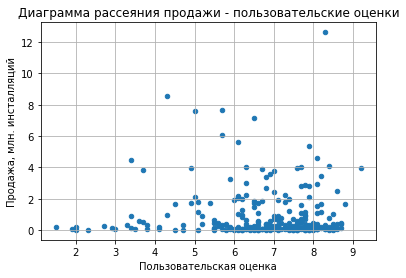

In [20]:
games_ps4=games13_16[games13_16['platform']=='PS4']

games_ps4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True);
plt.title ("Диаграмма рассеяния продажи - пользовательские оценки");
plt.xlabel("Пользовательская оценка");
plt.ylabel("Продажа, млн. инсталляций");
plt.show()

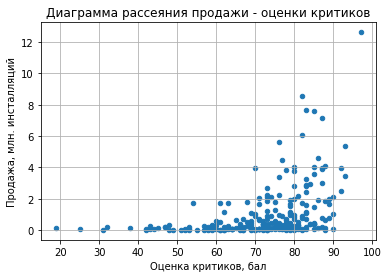

In [21]:
games_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True);
plt.title ("Диаграмма рассеяния продажи - оценки критиков");
plt.xlabel("Оценка критиков, бал");
plt.ylabel("Продажа, млн. инсталляций");
plt.show()

Построим таблицу с корреляциями для всех актуальных платформ.

In [22]:
scoring_table=actual_platforms
# корреляция пользовательских оценок и продаж
def user_scoring_table_build(row): 
    return games13_16[games13_16['platform']==row['platform']]['sum_sales'].corr(games13_16[games13_16['platform']==row['platform']]['user_score'])

# корреляция оценок критиков и продаж
def critic_scoring_table_build(row):
    return games13_16[games13_16['platform']==row['platform']]['sum_sales'].corr(games13_16[games13_16['platform']==row['platform']]['critic_score'])

# корреляция оценок критиков и пользователей
def critic_user_table_build(row):
    return games13_16[games13_16['platform']==row['platform']]['user_score'].corr(games13_16[games13_16['platform']==row['platform']]['critic_score'])

scoring_table['user_corr']=scoring_table.apply(user_scoring_table_build,axis=1)
scoring_table['critic_corr']=scoring_table.apply(critic_scoring_table_build,axis=1)
scoring_table['critic_user_corr']=scoring_table.apply(critic_user_table_build,axis=1)

scoring_table.sort_values('critic_corr', ascending=False)

,platform,user_corr,critic_corr,critic_user_corr
2,XOne,-0.068925,0.416998,0.472462
0,PS4,-0.031957,0.406568,0.557654
3,WiiU,0.419330,0.376415,0.721313
1,3DS,0.241504,0.357057,0.769536
6,X360,-0.011742,0.350345,0.520946
4,PS3,0.002394,0.334285,0.599920
7,PSV,0.000942,0.254742,0.611521
5,PC,-0.090552,0.197390,0.434282
8,Wii,0.682942,NaN,NaN


Ответ на вопросы 7 и 8

Для самой продуктивной платформы PS4 наблюдается умеренная положительная связь между оценками пользователей и критиков с коэффициентом Пирсона 0.56. Умеренная положительная связь между оценками критиков и объемом продаж с коэффициентом Пирсона 0.4. Слабая отрицательная связь между продажами и оценкой пользователей с коэффициентом Пирсона -0.03.

На других платформах все еще жухе - оценки критиков меньше коррелируют с продажами опускаясь до слабых корреляций на PC, Wii, PSV, корреляция оценок пользователей с продажами всегда слабая и разнонаправленная. 

Слабую корреляцию пользовательского скоринга с продажами связываю с тем, что для оценки игры пользователь должен ее купить. А дальше уже как повезет. При выборе игры пользователь в какой то степени ориентируется на отзывы критиков (умеренная корреляция продаж и оценок критиков). Но именно в какой-то степени.
    
Таким образом при выборе игр для перепродажи мнение пользователей учитывать не следует, мнение критиков следует учитывать, но не полагаться на него.

##### Вопрос 9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

genre
Action          322.22
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: sum_sales, dtype: float64

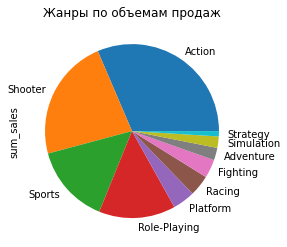

In [37]:
# строим таблицу продаж по жанрам
display(games13_16.groupby('genre')['sum_sales'].sum().sort_values(ascending=False))

# делаем график прожад по жанрам для наглядности
games13_16.groupby('genre')['sum_sales'].sum().sort_values(ascending=False).head(10).plot(kind='pie');
plt.title ("Жанры по объемам продаж");
plt.show()

In [24]:
games_by_genre=games13_16.pivot_table(index='genre', values=['sum_sales'], aggfunc=['count','mean','sum'])
games_by_genre.columns=['releases', 'mean_sale', 'sum_sales']
games_by_genre.sort_values('sum_sales', ascending=False)

,releases,mean_sale,sum_sales
genre,,,
Action,767,0.420104,322.22
Shooter,187,1.245882,232.98
Sports,214,0.703972,150.65
Role-Playing,292,0.499623,145.89
Platform,74,0.576081,42.63
Racing,85,0.469294,39.89
Fighting,80,0.441375,35.31
Adventure,245,0.096490,23.64
Simulation,62,0.350968,21.76


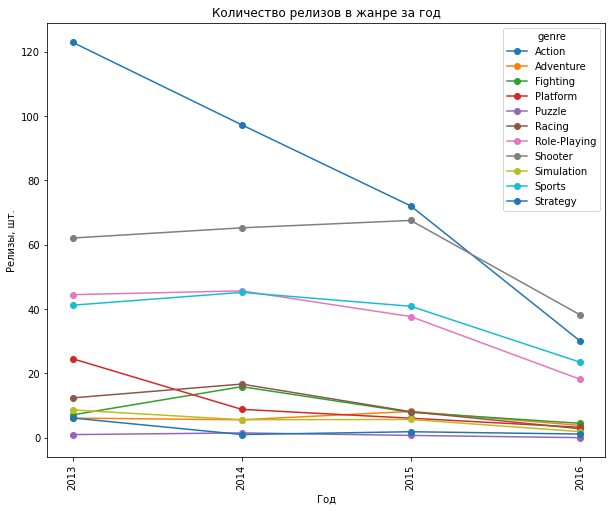

In [25]:
# Сводим количество релизов по годам и жанрам
games13_16.pivot_table(index='genre', values='sum_sales', columns='year_of_release', aggfunc='sum').T.plot(figsize=(10,8), style='o-');
plt.xticks(rotation=90);
plt.title ("Количество релизов в жанре за год");
plt.xlabel("Год");
plt.ylabel("Релизы, шт.");
plt.xticks((2013, 2014, 2015, 2016));

В абсолютном зачете лидирует Action с отрывом в 1.4 раза от Shooter, который с отрывом 1.5 раза опережает Sports и Role-Playing.

При этом если рассматривать средние продажи с одного релиза, лидирует жанр Shooter с отрывом в 1.7 раза от Spots, который с тем же отрывом опережает Role-Playing и Action.
    
Все это говорит скорее о том, что рынок был перенасыщен играми в стиле Action и испытывает некоторую нехватку Shooter и Sports и Role-Playing проектов. Смена трендов пожалуй заметна на графике количества релизов - Action быстрее других летит в пропасть.

##### Ответ на вопрос 9

Больше 3/4 объема рынка занимают игры жанров Action, Shooter, Sports, Role-Playing. Дальше идут существенно менее популярные жанры.

#### Шаг 4. Составьте портрет пользователя каждого региона

##### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [26]:
# Топ 5 платформ по продажам в ключевых регионах
display(games13_16.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head(5))
display(games13_16.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head(5))
display(games13_16.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head(5))

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


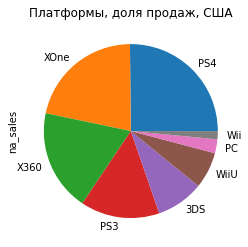

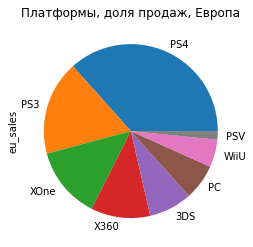

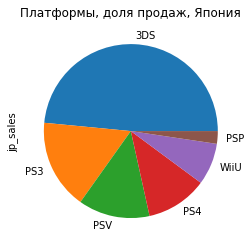

In [27]:
games13_16.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head(8).plot(kind='pie', subplots=True, legend=False);
plt.title ("Платформы, доля продаж, США");
plt.show()

games13_16.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head(8).plot(kind='pie', subplots=True, legend=False);
plt.title ("Платформы, доля продаж, Европа");
plt.show()

games13_16.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head(6).plot(kind='pie', subplots=True, legend=False);
plt.title ("Платформы, доля продаж, Япония");
plt.show()

Рынок северной америки самый большой, за ним следуют европейский и японский.

Представленность платформ на европейском и американском рынках близка - основные игроки Sony и Microsoft. При этом есть существенное отличие в выделении долей. Рынок США почти равномерно поделен между PS4, XOne, X360, PS3. Расстояние между конкурентами в 10-20 млн. копий.

На европейском рынке явный лидер Sony - PS4 и PS3 занимают больше половины, причем PS4 сам по себе - треть. На втором месте Microsoft приставками XOne и X360 занимая чуть меньше 1/4 рынка.

Рынок японии сильно меньше других, при этом отличается по структуре, поскольку лидирует портативная платформа 3DS занимая почти половину рынка. Вторую половину рынка плотно аккупировали приставки от Sony и небольшую долю занимает WiiU.

##### Самые популярные жанры (топ-5). Поясните разницу.

In [28]:
# Топ 5 жанров по продажам в ключевых регионах
display(games13_16.pivot_table(index='genre', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head(5))
display(games13_16.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head(5))
display(games13_16.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head(5))

,na_sales
genre,
Action,126.11
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Platform,18.14


,eu_sales
genre,
Action,118.38
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Fighting,7.65
Shooter,6.61
Adventure,5.82


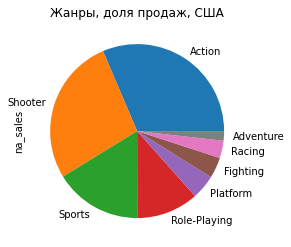

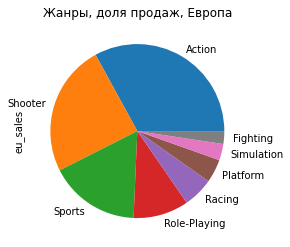

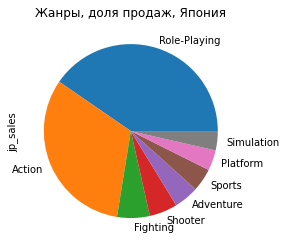

In [29]:
games13_16.pivot_table(index='genre', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head(8).plot(kind='pie', subplots=True, legend=False);
plt.title ("Жанры, доля продаж, США");
plt.show()

games13_16.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head(8).plot(kind='pie', subplots=True, legend=False);
plt.title ("Жанры, доля продаж, Европа");
plt.show()

games13_16.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head(8).plot(kind='pie', subplots=True, legend=False);
plt.title ("Жанры, доля продаж, Япония");
plt.show()

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Жанровые предпочтения жителей США и Европы схожи - любят Action, Shooter, Sports, Role-Playing, пятое место отличается - в США Platform, в Европе Racing.

Жанровые предпочтения жителей Японии более склоняются к ролевым играм, снижен интерес к Shooter, только у них в топ 5 входит Fighting и Adventure.

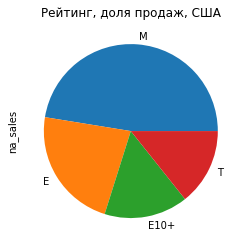

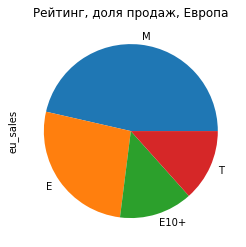

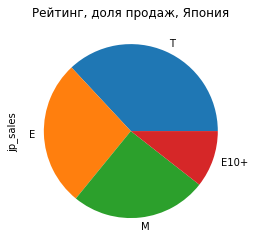

In [30]:
games13_16.pivot_table(index='rating', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).plot(kind='pie', subplots=True, legend=False);
plt.title ("Рейтинг, доля продаж, США");
plt.show()

games13_16.pivot_table(index='rating', values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).plot(kind='pie', subplots=True, legend=False);
plt.title ("Рейтинг, доля продаж, Европа");
plt.show()

games13_16.pivot_table(index='rating', values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).plot(kind='pie', subplots=True, legend=False);
plt.title ("Рейтинг, доля продаж, Япония");
plt.show()

Рейтинговые предпочтения позволяют нам сориентироваться возрасте покупателей. Европа и США - почти половина продаж совершается пользователям старше 17 лет. Порядка 1/4 - детям младше 10 лет, 1/8 - подросткам, 1/8 кому-то между подростками и детьми. Т.е. главные потребители видеоигр - взрослые. 

Япония - примерно 1/3 - подростки, 1/4 - дети, 1/4 - взрослые старше 17 лет и остальное - дети старше 10. Т.е. главные потребители видеоигр - дети и подростки.

#### Шаг 5. Проверьте гипотезы

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезу: Нулевая гипотеза - пользовательские рейтинги на платформах одинаковые. Альтернативная - разные.

Проверять будем st.ttest_ind как для независимых выборок. Предварительно необходимо будет проверить равенство дисперсий (или стандартных отклонений).

In [31]:
# Для метода st.ttest_ind проверим одинаковы ли дисперсии
desc1=games13_16[games13_16['platform']=='XOne']['user_score'].describe()
desc1.name='XOne'
desc2=games13_16[games13_16['platform']=='PC']['user_score'].describe()
desc2.name='PC'
compare=pd.concat([desc1, desc2], axis=1)
compare

,XOne,PC
count,182.000000,156.000000
mean,6.521429,6.283974
std,1.380941,1.745908
min,1.600000,1.400000
25%,5.800000,5.300000
50%,6.800000,6.800000
75%,7.500000,7.600000
max,9.200000,9.300000


Стандартные отклонения различны - вводим параметр equal_var=False

In [32]:
alpha = 0.05 
results = st.ttest_ind(games13_16[games13_16['platform']=='XOne']['user_score'].dropna(), games13_16[games13_16['platform']=='PC']['user_score'].dropna(), equal_var=False)

display(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу') 

'p-значение: 0.17156613829336056'

'Не получилось отвергнуть нулевую гипотезу'

При статистической значимости 5% мы не можем отвергнуть гипотезу о равенстве средней величины отзывов на платформах XOne и PC

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезу: Нулевая гипотеза - пользовательские рейтинги в жанрах одинаковые. Альтернативная - разные.

Проверять будем st.ttest_ind как для независимых выборок. Предварительно необходимо будет проверить равенство дисперсий (или стандартных отклонений).

In [33]:
# Для метода st.ttest_ind проверим одинаковы ли дисперсии
desc1=games13_16[games13_16['genre']=='Action']['user_score'].describe()
desc1.name='Action'
desc2=games13_16[games13_16['genre']=='Sports']['user_score'].describe()
desc2.name='Sports'
compare=pd.concat([desc1, desc2], axis=1)
compare

,Action,Sports
count,390.000000,160.000000
mean,6.841795,5.238125
std,1.331127,1.783427
min,2.000000,0.200000
25%,6.300000,4.100000
50%,7.100000,5.500000
75%,7.800000,6.500000
max,9.100000,8.800000


На основании полученных выше стат. данных корректирую гипотезу: Нулевая гипотеза - пользовательские рейтинги в жанрах одинаковые. Альтернативная - пользоватеьский рейтинг жанра Action выше. Стандартные отклонения различны - вводим параметр equal_var=False

In [34]:
alpha = 0.05
results = st.ttest_ind(games13_16[games13_16['genre']=='Action']['user_score'].dropna(), games13_16[games13_16['genre']=='Sports']['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1834440653354691e-20
Отвергаем нулевую гипотезу


При статистической значимости 5% можем отвергнуть гипотезу о равенстве средней величины отзывов в жанрах Action и Sports в пользу альтернативной гипотезы о большем среднем в жанре Action.

# Выводы и заключение

### Полученные данные

    Получен массив данных games.csv, содержащий 16 715 строк с данными о продажах игр и описанием.
    В названиях столбцов встречается верхний регистр.
    Пользовательский рейтинг представлен текстом, много записей со значением tbd ('to be done' или подобное).
    Полные дубликаты отсутствуют.
    Значительное число пропусков, особенно в скоринге и рейтинге. Пропуски в скорингах связываю с тем, что пользователи и критики не оставили оценок на малопопулярные игры. Пропуски в рейтинге присущи старым играм и играм с низкой популярностью.
    Два пропуска в названии игры - удалены.
    Отсутствие года релиза в 269 случаев. В некоторых случаях год релиза заложен в названии игры и его можно восстановить.
    В жанре часто встречается Misc - типа иное, появился при категоризации при подготовке данных перед отправкой мне. Заменяю на None

### Предобработка данных

    Удалены 2 записи игр без названий
    Год релиза восстановлен для 17 игр.
    В поле user_score записи со значением tbd заменены на пропуски, формат данных переведен во float
    В поле genre значение Misc заменено на пропуск
    Пропуски в рейтингах и скорингах оставлены без изменений, чтобы не искажать данные
    Добавлен столбец с суммарными продажами по всем рынкам sum_sales   

### Исследовательский анализ данных

##### Платформы

Пик производства игр пришелся на 2008-2009 годы, дальше практически двукратное снижение количества релизов к 2012 году. Откат к 2015 и потом снова падение. Поэтому 2017 - год неопределенности. Либо индустрия найдет выход (скорее всего), либо продолжит падение. Анализировать ситуацию до 2010 года нет смысла.

Игровые платформы, на базе которых выходят те, или иные игры отличаются количеством на них релизов игр, объемом продаж копий и совокупной прибыльностью. За исключением платформ-долгожителей, типа PC, время жизни игровой платформы не превышает 11 лет. Практически всегда в первой половине срока жизни продажи растут, после пика - падают. 

_10 самых прибыльных платформ_ __DS, GBA, PC, PS, PS2, PS3, PS4, PSP, Wii, X360__ заметно, что половина из представленного - линейка Sony play station

_Актуальные платформы_ (те, на которых есть релизы за последний отчетный год) - __X360, PS3, Wii, PS4, PC, 3DS, XOne, WiiU, PSV__ делятся по линейкам производителей Sony (PS3, PS4, PSV), Microsoft (X360, XOne), Nintendo (Wii, WiiU). Особняком стоят PC как вечная классика и 3DS как единственная в обзоре портативная игровая платформа.

Сравнение количества проданных копий игр за 2015 и 2016 год показывает, что для всех актуальных платформ наблюдается снижение объема продаж. Это в точности соответствует падению объема релизов и объема продаж в целом по отрасли. Отметим, что при общем падении, перспективы у платфом различны. Последнее поколение платформ в линейках Sony, Microsoft и Nintendo перспективнее. 

Успешность платформы должна зависеть от релизов на ней игр. Причем, судя по гистограмме na_sales, коммерчески успешных игровых проектов существенно меньше, чем неуспешных. На примере Grand Theft Auto V видно, что игру сначала выпускают на популярных в это время платформах, далее портируя на остальные эту же версию игры, либо ее следующее поколение. Смена поколений игры очень грубо (поскольку на одном примере) можно оценить в 5 лет. Время портирования - год-два. При этом следующее поколение игры может выходить одновременно на самой новой платформе линейки и на предыдущей. Таким образом, можно ожидать, что в ближайшее время появятся топовые игры на новых платформах PSV (релиз 2011), XOne (релиз 2013), WiiU (релиз 2012).

Поэтому при выборе диапазона данных для прогнозирования необходимо ориентироваться на следующие факторы:

- время жизни платформ - нет смысла брать периоды более половины времени жизни платформы (примерно 5 лет), нет смысла рассматривать платформы, на которых не выходят релизы. Из платформ, относящихся к линейке какого-то производителя перспективнее всегда последняя версия.
- топовые игры на платформах появляются с задержкой от 1 года необходимого для портирования до 5 лет, необходимых для выпуска нового релиза.
- после падения начавшегося в 2010 году рынок не оправился окончательно и может в любой момент начать подниматься, либо падать. Подъем рынка прежде всего может быть связан с появлением новых успешных проектов, либо обновлениями предыдущих.

_Основываясь на вышеизложенном. Исходя из падения рынка, начавшегося 6 лет назад, появлением трех новых платформ основных поставщиков 5 лет назад, малым количеством новых успешных игровых проектов, считаю потенциально полезным для дальнейшей работы разделить рассмотрение на 2 части. 1 - анализ топовых релизов 2007-2010 года. Смотреть какие из них планируются к обновлению и в какие сроки это стратегия. 2 - смотреть ближайшие 2-3 года, скажем 2013-2016 для отслеживания тенденций изменений рынков, предпочтений пользователей и т.п. Это тактика. Поскольку стратегических задач перед нами не ставили, будет решать тактические и ограничимся 2013-2016 годами._

По объемам продаж поколения платформ не сменились окончательно. XOne уже обошла X360, но PSV толчется внизу. По средним продажам PS4 и X360 лидируют, но среднее по величине порядка 3 квартиля. Реальная прибыль на редких успешных проектах именно там - между 75% и max. И на новых платформах ее пока нет.

##### Скейлинг

Для самой продуктивной платформы PS4 наблюдается умеренная положительная связь между оценками пользователей и критиков с коэффициентом Пирсона 0.56. Умеренная положительная связь между оценками критиков и объемом продаж с коэффициентом Пирсона 0.4. Слабая отрицательная связь между продажами и оценкой пользователей с коэффициентом Пирсона -0.03.

На других платформах все еще жухе - оценки критиков меньше коррелируют с продажами опускаясь до слабых корреляций на PC, Wii, PSV, корреляция оценок пользователей с продажами всегда слабая и разнонаправленная.

Слабую корреляцию пользовательского скоринга с продажами связываю с тем, что для оценки игры пользователь должен ее купить. А дальше уже как повезет. При выборе игры пользователь в какой то степени ориентируется на отзывы критиков (умеренная корреляция продаж и оценок критиков). Но именно в какой-то степени.

Таким образом при выборе игр для перепродажи мнение пользователей учитывать не следует, мнение критиков следует учитывать, но не полагаться на него.

##### Жанры

Больше 3/4 объема рынка занимают игры жанров Action (322 млн. копий), Shooter (233 млн. копий), Sports (151 млн. копий), Role-Playing (146 млн. копий). Дальше идут существенно менее популярные жанры.

### Портрет пользователя каждого региона

Наш магазин выделят три ключевых региона - Северная Америка (437 млн. копий), Европа (392 млн. копий), Япония (141 млн. копий). Остальные регионы в совокупности дают 120 млн. копий.

##### Северная Америка

Наиболее популярные платформы (в скобках объем продаж в млн. копий) PS4 (109), XOne (93), X360 (82), PS3 (63), 3DS (38). Различие между платформами 10 - 20 млн. копий, т.е. нет какого-то ярко выраженного лидера. Платформа PSV еще не вошла в топ, компактная платформа 3DS занимает 5 место, ни одна из стационарных платформ Nintendo не вошла в топ.

Наиболее популярные жанры - Action (126), Shooter (110), Sports (65), Role-Playing (46), Platform (18). Явно выделяется жанр Action (1/3 рынка), Action, Shooter и Sports в совокупности занимают 3/4 рынка.

Почти 1/2 проданных игр имеют рейтинг __М__, 1/4 - __Е__, остальное в равных долях __Е10__ и __Т__. Т.е. практически половина игр приобретается для взрослых игроков, четверть - для детей и еще четверть для детей в возрасте от 10 до 19 лет.

##### Европа

Наиболее популярные платформы (в скобках объем продаж в млн. копий) PS4 (141), PS3 (68), XOne (52), X360 (43), 3DS (31). В отличие от рынка северной Америки, среди платформ есть ярко выраженный лидер PS4, занимающий 1/3 рынка. Платформа PSV еще не вошла в топ, компактная платформа 3DS занимает 5 место, ни одна из стационарных платформ Nintendo не вошла в топ.

Жанровый срез - копия северной америки. Action (118), Shooter (88), Sports (61), Role-Playing (37), Platform (20). Явно выделяется жанр Action (1/3 рынка), Action, Shooter и Sports в совокупности занимают 3/4 рынка.

Возрастной срез пользователей тоже очень похож на северную америку. Почти 1/2 проданных игр имеют рейтинг __М__, 1/4 - __Е__, остальное в равных долях __Е10__ и __Т__. Т.е. практически половина игр приобретается для взрослых игроков, четверть - для детей и еще четверть для детей в возрасте от 10 до 19 лет

##### Япония

Регион существенно отличается от двух описанных выше. 

Наиболее популярные платформы - 3DS (68), PS3 (23), (PSV), PS4 (16), WIIU (11). Единственный из регионов, где лидирует, занимая почти половину рынка компактная платформа 3DS. В топ-5 не вошла ни одна из платформ Microsoft, при этом есть последняя платформа Nintendo - WiiU.

Жанровые предпочтения в японии так же сильно отличаются. Role-Playing (51), Action (40), Fighting (8), Shooter (7), Adventure (6). Более трети рынка - Role-Playing, треть - Action, чуть меньше трети на все остальное. 

Примерно примерно 1/3 - рейтинг __Т__ (подростки), 1/4 - __E__ (дети), 1/4 - __M__, взрослые старше 17 лет и остальное - дети старше 10. Т.е. основной потребитель видео игр - подросток, что существенно отличается от рынков северной Америки и Европы.

### Проверка гипотез

Проверены две гипотезы. Обе проверялись методом st.ttest_ind для сравнения независимых выборок при стат. значимости 5%.

Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтверждена. При заданном уровне стат. значимости мы не можем говорить о различии параметров.

Гипотеза 2 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. На практике проверялась нулевая гипотеза о равенстве пользовательских рейтингов этих двух жанров при альтернативной гипотезе о большей величине пользовательского рейтинга жанра Action. При стат. значимости 5% нулевая гипотеза была отвергнута в пользу альтернативной. Таким образом, мы можем утверждать, что средние пользовательские оценки жанра Action выше оценок жанра Sports.

### Заключение

Проведен анализ полученных данных, в качестве рекомендаций на 2017 год можно выделить следующее:

    - необходимо отслеживать появление новых релизов серийных игр и в целом релизов крупных проектов, способных предоставить значительную прибыль.
    - сконцентрировать внимание на уходящих, но еще популярных платформах PS4, PS3, X360, а так же новых платформах PSV, XOne, 3DS, WiiU. Особое внимание к платформе 3DS на рынке Японии и платформам PSV, XOne в европе и северной америке.
    - при выборе игр для закупки на отзывы пользователей ориентироваться не следует, отзывы критиков - учитывать.
    - ожидается активная продажа игр в жанрах Action, Shooter, Sports, Role-Playing, Platform.
    - ориентироваться прежде всего на взрослую целевую аудиторию в Европе и северной америке, подростков - в Японии
    - средние пользовательские рейтинги платформ Xbox One и PC равны.
    - средние пользовательские рейтинги игр жанра Action выше, чем жанра Sports